# 신경망 모델 훈련

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [6]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [7]:
model=model_fn()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=5,verbose=0)

In [9]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


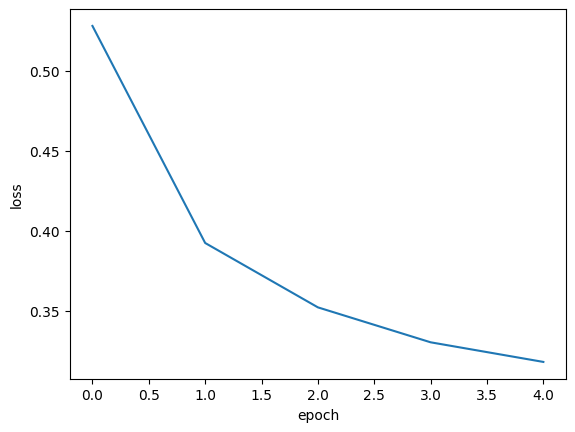

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

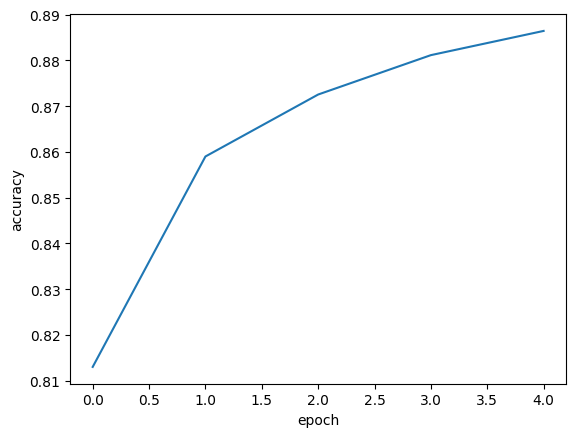

In [11]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


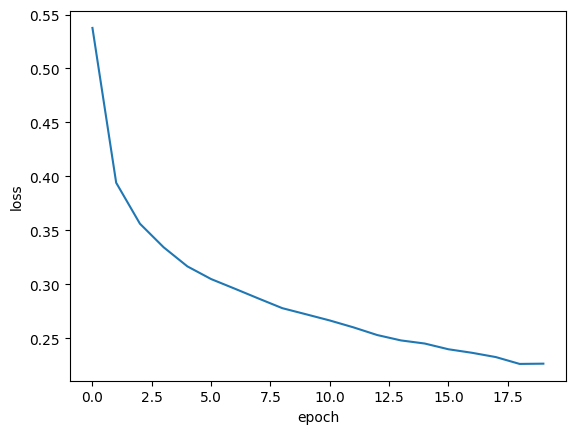

In [12]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


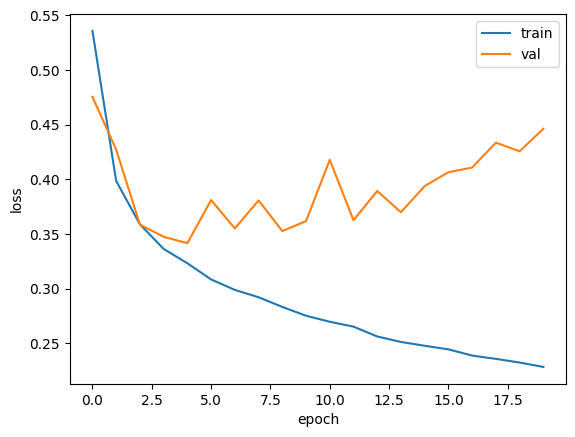

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


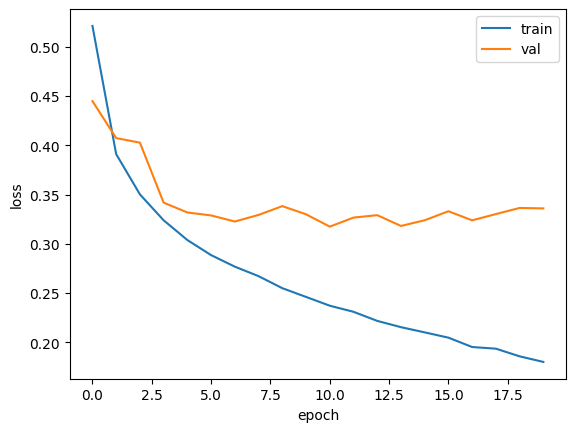

In [18]:
model=model_fn()
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)
history=model.fit(
    train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target)
)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [56]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

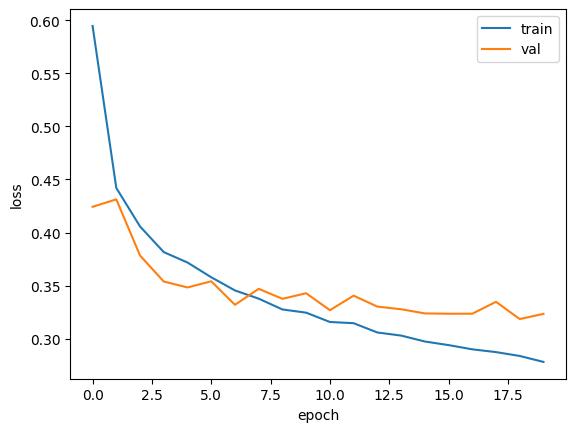

In [57]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [58]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)
history=model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))

In [59]:
model.save('model-whole.keras')

In [60]:
model.save_weights('model.weights.h5')

In [61]:
# !ls -al model*

!chcp 65001
!dir model*

Active code page: 65001
 Volume in drive G is SSD
 Volume Serial Number is 2EE1-411F

 Directory of g:\github\self_MachineLearning-DeepLearning

2026-02-02  오전 04:33           979,404 model-whole.keras
2026-02-02  오전 04:33           976,600 model.weights.h5
               2 File(s)      1,956,004 bytes
               0 Dir(s)  567,506,178,048 bytes free


In [62]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [63]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
0.8800833333333333


In [64]:
model=keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8801 - loss: 0.3283


[0.3283137083053589, 0.8800833225250244]

In [67]:
import tensorflow
tensorflow.__version__

'2.20.0'

In [74]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)
model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
model=keras.models.load_model('best-model.keras')
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8866 - loss: 0.3137


[0.31365805864334106, 0.8865833282470703]

In [77]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(
    x=train_scaled,
    y=train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_scaled, val_target),
    callbacks=[
        checkpoint_cb,
        early_stopping_cb,
    ],
)

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
print(early_stopping_cb.stopped_epoch)

7


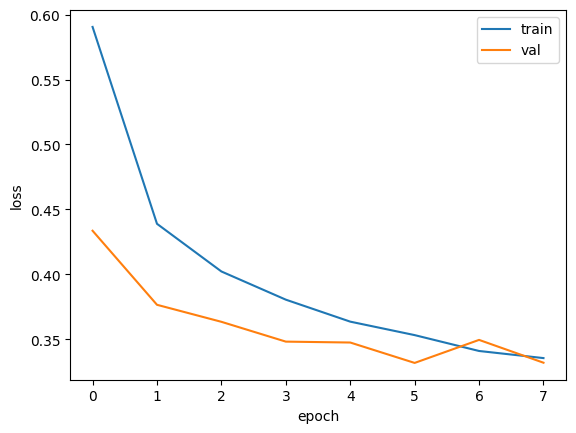

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [81]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8773 - loss: 0.3317


[0.3316962420940399, 0.8773333430290222]